<a href="https://colab.research.google.com/github/Mayurpjadhav11/ml-practice-repo/blob/basics-of-regression/simple_regression_height_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("/content/height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


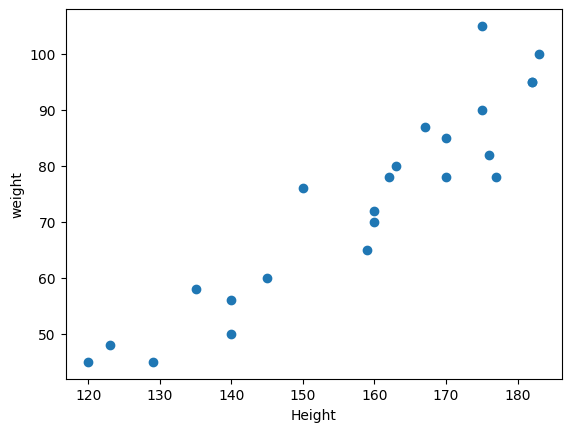

In [4]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel("Height")
plt.ylabel("weight")
plt.show()

In [5]:
#correlation Matrix
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


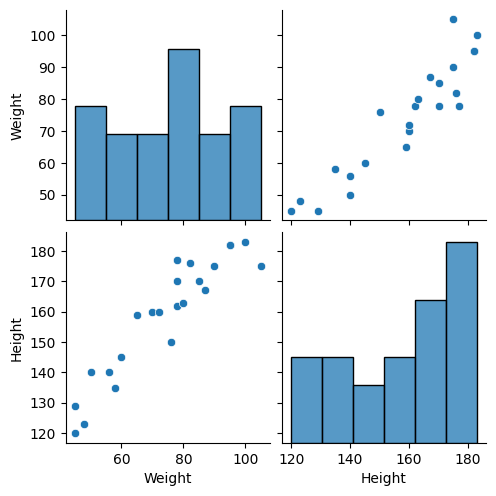

In [6]:
#searborn for visualization
import seaborn as sns
sns.pairplot(df)

In [7]:
# Independent and dependant features
X = df[["Weight"]] #Independent should be in data frame or 2d array
Y =df["Height"] #dependant feature need to be in one dim or series

In [8]:
# Train test split'
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=22)

In [10]:
#standardization
from sklearn.preprocessing import StandardScaler

In [11]:
scalar=StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [12]:
#Apply Linear Regression
from sklearn.linear_model import LinearRegression

In [13]:
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train, Y_train)

LinearRegression(n_jobs=-1)

In [14]:
print("Coefficient or slope is ", regression.coef_)
print("Intercept is ", regression.intercept_)

Coefficient or slope is  [19.11243802]
Intercept is  157.88235294117646


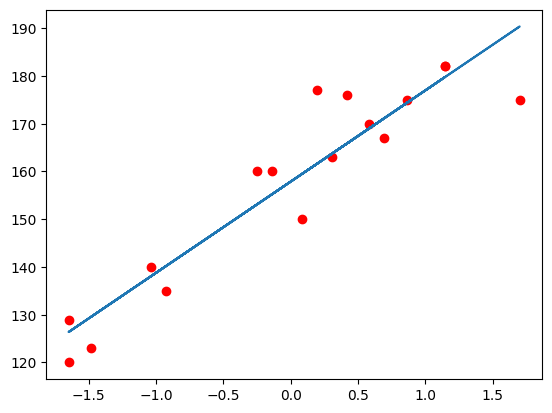

In [15]:
#plot training data best fit line
plt.scatter(X_train, Y_train, color="red")
plt.plot(X_train, regression.predict(X_train))

In [16]:
#prediction for test data
y_predict= regression.predict(X_test)
# y_predict = intercept + coef(weight)

In [17]:
#performance matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, adjusted_rand_score

In [18]:
mse = mean_squared_error(Y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_predict)
r2 = r2_score(Y_test, y_predict)
adjusted_r = 1-(1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("MSE is ", mse)
print("RMSE is ", rmse)
print("MAE is ", mae)
print("r2 is ", r2)
print("Adjusted r is ", adjusted_r)

MSE is  46.26979548468256
RMSE is  6.802190491649183
MAE is  5.505695075635202
r2 is  0.7794634400306406
Adjusted r is  0.7243293000383008


In [21]:
prediction = regression.predict(X_test)

In [23]:
regression.predict(scalar.transform([[78]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([161.58283616])